# Slovenia Traffic Data Analysis - Data Exploration

This notebook performs initial exploration of the DARS traffic dataset.


In [ ]:
# Import required libraries
import sys
import os
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Import custom modules
from src.data_processing import DataLoader, DataPreprocessor, DataImputer


## 1. Load Configuration


In [ ]:
import yaml
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Load configuration
with open('../config/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print("Project:", config['project']['name'])
print("Version:", config['project']['version'])


# Slovenia Traffic Data Analysis - Data Exploration

This notebook performs initial exploration of the DARS traffic dataset.

In [12]:
# Import required libraries
import sys
import os
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Import custom modules
from src.data_processing import DataLoader, DataPreprocessor, DataImputer

## 1. Load Configuration

In [13]:
import yaml
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Load configuration
with open('../config/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print("Project:", config['project']['name'])
print("Version:", config['project']['version'])

Project: Slovenia Traffic Analysis
Version: 0.1.0


## 2. Load Data

In [32]:
# Load CSV files
# Load preprocessed data
df_counts = pd.read_csv('../data/production_merged_vehicle_count.csv', dtype={'road_code': str})
df_speeds = pd.read_csv('../data/production_merged_vehicle_speed.csv', dtype={'road_code': str})

# Merge count and speed data
df = pd.merge(df_counts, df_speeds, 
              on=['road_name', 'road_code', 'date', 'Time'], 
              suffixes=('_count', '_speed'))

# Create datetime column from date and Time columns
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['Time'])

print(f"Loaded {len(df)} records")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Unique roads: {df['road_name'].nunique()}")
print(f"Available columns: {df.columns.tolist()}")
df.head()

Loaded 1183248 records
Date range: 2020-08-30 00:00:00 to 2025-08-29 23:00:00
Unique roads: 19
Available columns: ['road_name', 'road_code', 'date', 'Time', 'direction_A_name_count', 'direction_B_name_count', 'direction_A_count', 'direction_B_count', 'Lane_1', 'Lane_2', 'Lane_3', 'Total_All_Lanes', 'Vignette_1', 'Vignette_2', 'Toll_1', 'Toll_2', 'Toll_3', 'Trucks_7.5t', 'datetime_count', 'direction_A_name_speed', 'direction_B_name_speed', 'Speed_Lane_1', 'Speed_Lane_2', 'Speed_Lane_3', 'Avg_Speed', 'Min_Speed', 'Max_Speed', 'StdDev_Speed', 'datetime_speed', 'datetime']


road_name road_code        date   Time direction_A_name_count  \
0  Bertoki HC      0011  2020-08-30  00:00        Bertoki → Koper   
1  Bertoki HC      0011  2020-08-30  01:00        Bertoki → Koper   
2  Bertoki HC      0011  2020-08-30  02:00        Bertoki → Koper   
3  Bertoki HC      0011  2020-08-30  03:00        Bertoki → Koper   
4  Bertoki HC      0011  2020-08-30  04:00        Bertoki → Koper   

  direction_B_name_count  direction_A_count  direction_B_count  Lane_1  \
0        Koper → Bertoki                 89                290      89   
1        Koper → Bertoki                132                183     132   
2        Koper → Bertoki                 80                200      80   
3        Koper → Bertoki                150                149     150   
4        Koper → Bertoki                142                228     142   

   Lane_2  ...  direction_B_name_speed  Speed_Lane_1  Speed_Lane_2  \
0     140  ...         Koper → Bertoki           113           120   
1      74  ...         Koper → Bertoki           104            97   
2     153  ...         Koper → Bertoki           134           104   
3      71  ...         Koper → Bertoki            93            81   
4     162  ...         Koper → Bertoki           126           129   

   Speed_Lane_3  Avg_Speed  Min_Speed  Max_Speed  StdDev_Speed  \
0           111      114.0      111.0      120.0          14.0   
1           105      102.0       97.0      105.0          13.0   
2           117      118.0      104.0      134.0          13.0   
3            88       87.0       81.0       93.0          14.0   
4           129      128.0      126.0      129.0          13.0   

        datetime_speed            datetime  
0  2020-08-30 00:00:00 2020-08-30 00:00:00  
1  2020-08-30 01:00:00 2020-08-30 01:00:00  
2  2020-08-30 02:00:00 2020-08-30 02:00:00  
3  2020-08-30 03:00:00 2020-08-30 03:00:00  
4  2020-08-30 04:00:00 2020-08-30 04:00:00  

[5 rows x 30 columns]

## 3. Data Quality Assessment

In [33]:
len(df_counts)
len(df_speeds)

1183248

In [34]:
# Check for missing values
missing_stats = df.isnull().sum()
missing_pct = (missing_stats / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_stats,
    'Missing %': missing_pct
})

print("Missing Data Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

Missing Data Summary:
              Missing Count  Missing %
Min_Speed            580128  49.028437
Max_Speed            580128  49.028437
StdDev_Speed         580128  49.028437


## 4. Statistical Summary

In [35]:
# Statistical summary
df.describe()

direction_A_count  direction_B_count        Lane_1        Lane_2  \
count       1.183248e+06       1.183248e+06  1.183248e+06  1.183248e+06   
mean        1.035853e+02       1.974578e+02  1.035853e+02  1.113902e+02   
min         2.000000e+01       2.500000e+01  2.000000e+01  1.500000e+01   
25%         6.400000e+01       1.500000e+02  6.400000e+01  7.300000e+01   
50%         1.010000e+02       1.950000e+02  1.010000e+02  1.110000e+02   
75%         1.390000e+02       2.410000e+02  1.390000e+02  1.490000e+02   
max         2.250000e+02       4.950000e+02  2.250000e+02  2.700000e+02   
std         4.758796e+01       6.913929e+01  4.758796e+01  4.921335e+01   

             Lane_3  Total_All_Lanes    Vignette_1    Vignette_2  \
count  1.183248e+06     1.183248e+06  1.183248e+06  1.183248e+06   
mean   8.606757e+01     3.010431e+02  3.000259e+01  1.624366e+01   
min    1.000000e+01     4.900000e+01  1.000000e+01  5.000000e+00   
25%    5.000000e+01     2.430000e+02  2.000000e+01  1.000000e+01   
50%    8.500000e+01     2.970000e+02  3.000000e+01  1.600000e+01   
75%    1.200000e+02     3.530000e+02  4.000000e+01  2.200000e+01   
max    2.250000e+02     7.120000e+02  5.000000e+01  3.000000e+01   
std    4.301160e+01     8.597764e+01  1.183517e+01  6.919944e+00   

             Toll_1        Toll_2        Toll_3   Trucks_7.5t  Speed_Lane_1  \
count  1.183248e+06  1.183248e+06  1.183248e+06  1.183248e+06  1.183248e+06   
mean   1.499220e+01  9.010398e+00  6.003458e+00  1.099852e+01  9.767542e+01   
min    5.000000e+00  3.000000e+00  2.000000e+00  2.000000e+00  6.000000e+01   
25%    1.000000e+01  6.000000e+00  4.000000e+00  6.000000e+00  8.300000e+01   
50%    1.500000e+01  9.000000e+00  6.000000e+00  1.100000e+01  9.800000e+01   
75%    2.000000e+01  1.200000e+01  8.000000e+00  1.600000e+01  1.120000e+02   
max    2.500000e+01  1.500000e+01  1.000000e+01  2.000000e+01  1.450000e+02   
std    6.055910e+00  3.742031e+00  2.584143e+00  5.474257e+00  1.896055e+01   

       Speed_Lane_2  Speed_Lane_3     Avg_Speed      Min_Speed      Max_Speed  \
count  1.183248e+06  1.183248e+06  1.183248e+06  603120.000000  603120.000000   
mean   9.521877e+01  9.276167e+01  9.504852e+01      97.289531     112.786530   
min    5.500000e+01  5.000000e+01  5.500000e+01      65.000000      66.000000   
25%    8.000000e+01  7.700000e+01  8.300000e+01      84.000000     100.000000   
50%    9.600000e+01  9.400000e+01  9.230000e+01      97.000000     113.000000   
75%    1.100000e+02  1.080000e+02  1.060000e+02     110.000000     126.000000   
max    1.450000e+02  1.450000e+02  1.450000e+02     145.000000     145.000000   
std    2.009402e+01  2.144873e+01  1.648637e+01      15.902452      15.893155   

        StdDev_Speed                       datetime  
count  603120.000000                        1183248  
mean       10.005551  2023-02-28 23:29:59.999997952  
min         5.000000            2020-08-30 00:00:00  
25%         7.000000            2021-11-29 11:45:00  
50%        10.000000            2023-02-28 23:30:00  
75%        13.000000            2024-05-30 11:15:00  
max        15.000000            2025-08-29 23:00:00  
std         3.158444                            NaN

## 5. Time Series Visualization

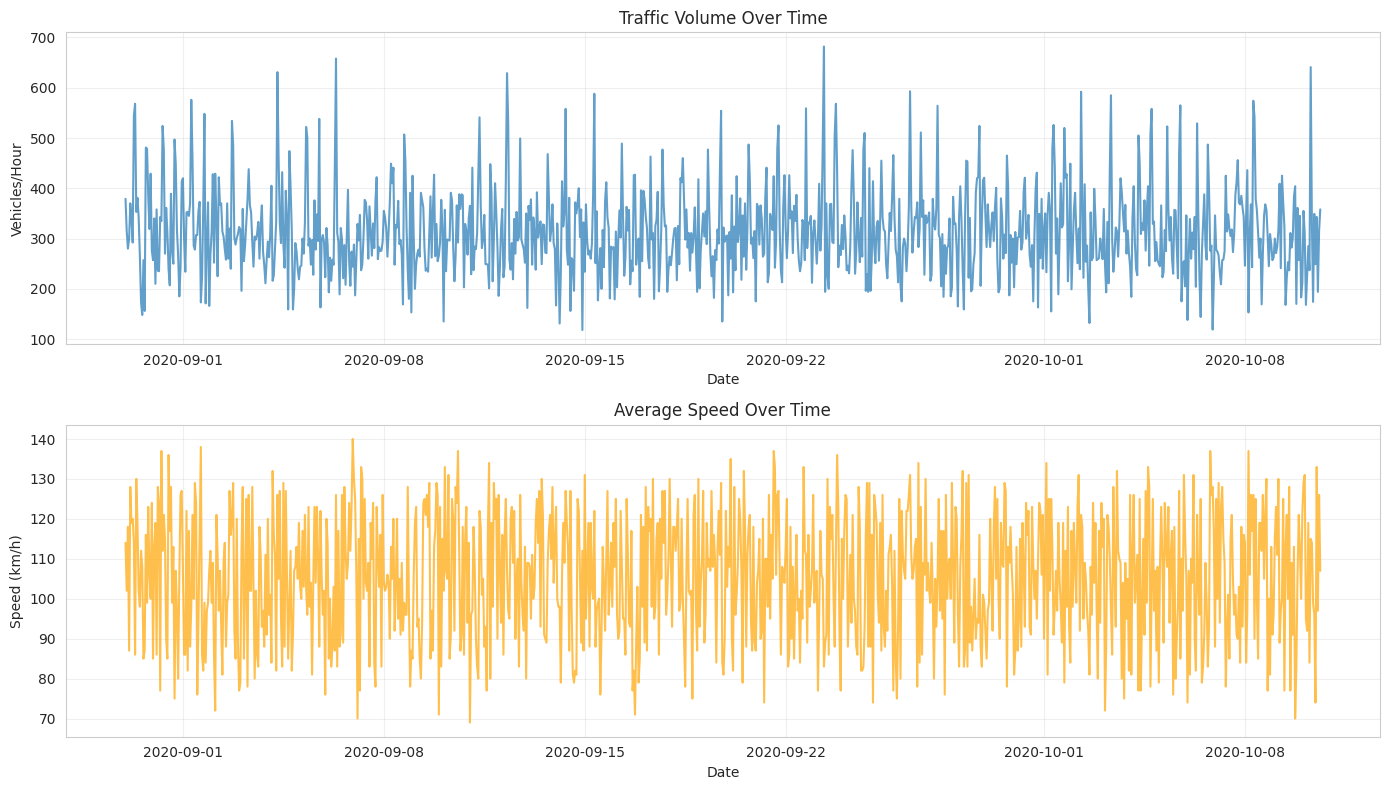

In [36]:
# Sample data for visualization (first 1000 rows for performance)
df_sample = df.head(1000).copy()

# Plot traffic volume over time
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Traffic volume - check for correct column name
if 'Total_All_Lanes' in df_sample.columns:
    volume_col = 'Total_All_Lanes'
elif 'Total_count' in df_sample.columns:
    volume_col = 'Total_count'
else:
    volume_col = df_sample.select_dtypes(include=[np.number]).columns[0]

# Average speed - check for correct column name  
if 'Avg_Speed' in df_sample.columns:
    speed_col = 'Avg_Speed'
elif 'Average_speed' in df_sample.columns:
    speed_col = 'Average_speed'
else:
    speed_cols = [col for col in df_sample.columns if 'speed' in col.lower()]
    speed_col = speed_cols[0] if speed_cols else df_sample.select_dtypes(include=[np.number]).columns[1]

# Traffic volume
axes[0].plot(df_sample['datetime'], df_sample[volume_col], alpha=0.7)
axes[0].set_title('Traffic Volume Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Vehicles/Hour')
axes[0].grid(True, alpha=0.3)

# Average speed
axes[1].plot(df_sample['datetime'], df_sample[speed_col], alpha=0.7, color='orange')
axes[1].set_title('Average Speed Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Speed (km/h)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

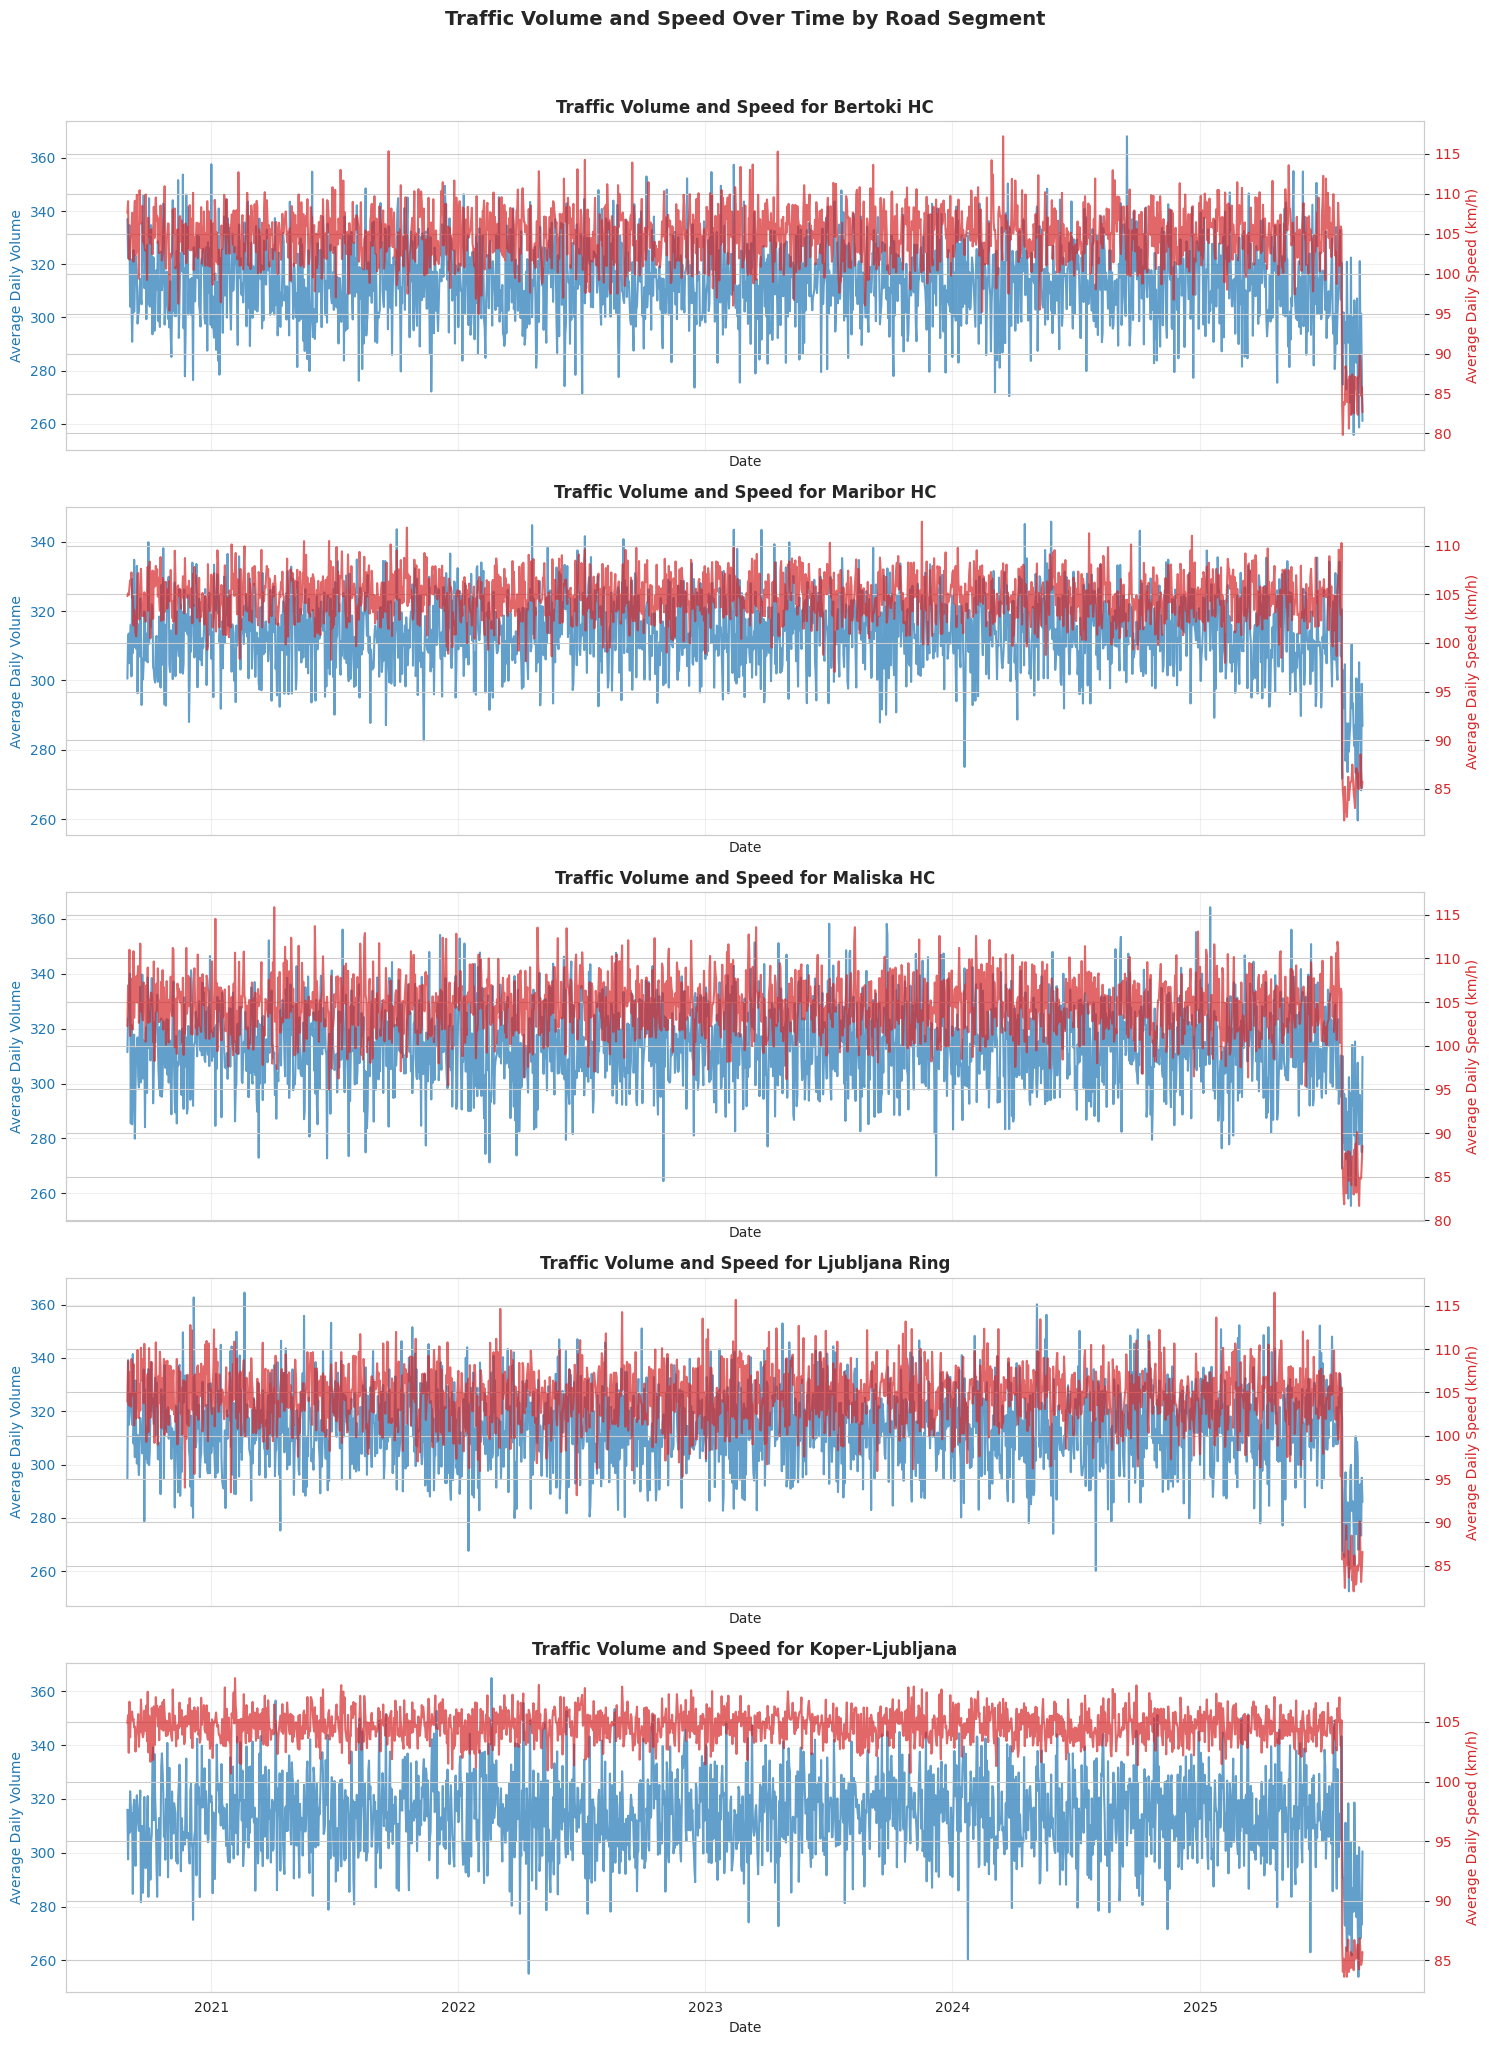


Summary Statistics by Road:
                     Total_All_Lanes        Avg_Speed        Trucks_7.5t
                                mean    std      mean    std        mean
road_name                                                               
Bertoki HC                    313.14  88.74    104.47  15.77       11.03
Bled-Austria Border           287.52  81.85     85.07  10.16       11.01
Celje-Maribor                 313.71  88.21    104.32  15.75       10.97
Celje-Velenje                 287.57  81.67     84.91  10.15       10.99
Koper Port                    286.58  81.58     84.96  10.17       11.02
Koper-Ljubljana               313.91  87.55    104.37  15.73       11.00
Kranj-Bled                    288.25  81.64     85.04  10.24       10.95
Ljubljana Bypass              287.74  81.53     85.09  10.16       11.01
Ljubljana Ring                313.54  87.93    104.36  15.73       11.03
Ljubljana-Celje               287.13  81.87     84.98  10.18       10.98
Ljubljana-Kranj       

In [37]:
# Multiplot for traffic volume and speed per road
road_names = df['road_name'].unique()[:5]  # Limit to first 5 roads for readability
n_roads = len(road_names)

fig, axes = plt.subplots(n_roads, 1, figsize=(15, 4 * n_roads), sharex=True)

# Ensure axes is an array even for a single road
if n_roads == 1:
    axes = [axes]

for i, road_name in enumerate(road_names):
    ax = axes[i]
    df_road = df[df['road_name'] == road_name].copy()
    
    # To make the plot readable, we resample the data to daily averages
    # Use numeric_only=True to avoid trying to average string columns
    df_road_daily = df_road.set_index('datetime').resample('D').mean(numeric_only=True).reset_index()

    # Plot traffic volume
    color_volume = 'tab:blue'
    ax.set_xlabel('Date')
    ax.set_ylabel('Average Daily Volume', color=color_volume)
    ax.plot(df_road_daily['datetime'], df_road_daily['Total_All_Lanes'], 
            color=color_volume, alpha=0.7, linewidth=1.5)
    ax.tick_params(axis='y', labelcolor=color_volume)
    ax.set_title(f'Traffic Volume and Speed for {road_name}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

    # Create a second y-axis for speed
    ax2 = ax.twinx()
    color_speed = 'tab:red'
    ax2.set_ylabel('Average Daily Speed (km/h)', color=color_speed)
    ax2.plot(df_road_daily['datetime'], df_road_daily['Avg_Speed'], 
             color=color_speed, alpha=0.7, linewidth=1.5)
    ax2.tick_params(axis='y', labelcolor=color_speed)

fig.suptitle('Traffic Volume and Speed Over Time by Road Segment', fontsize=14, fontweight='bold', y=1.02)
fig.tight_layout()
plt.show()

# Summary statistics per road
print("\nSummary Statistics by Road:")
road_summary = df.groupby('road_name').agg({
    'Total_All_Lanes': ['mean', 'std'],
    'Avg_Speed': ['mean', 'std'],
    'Trucks_7.5t': 'mean'
}).round(2)
print(road_summary)

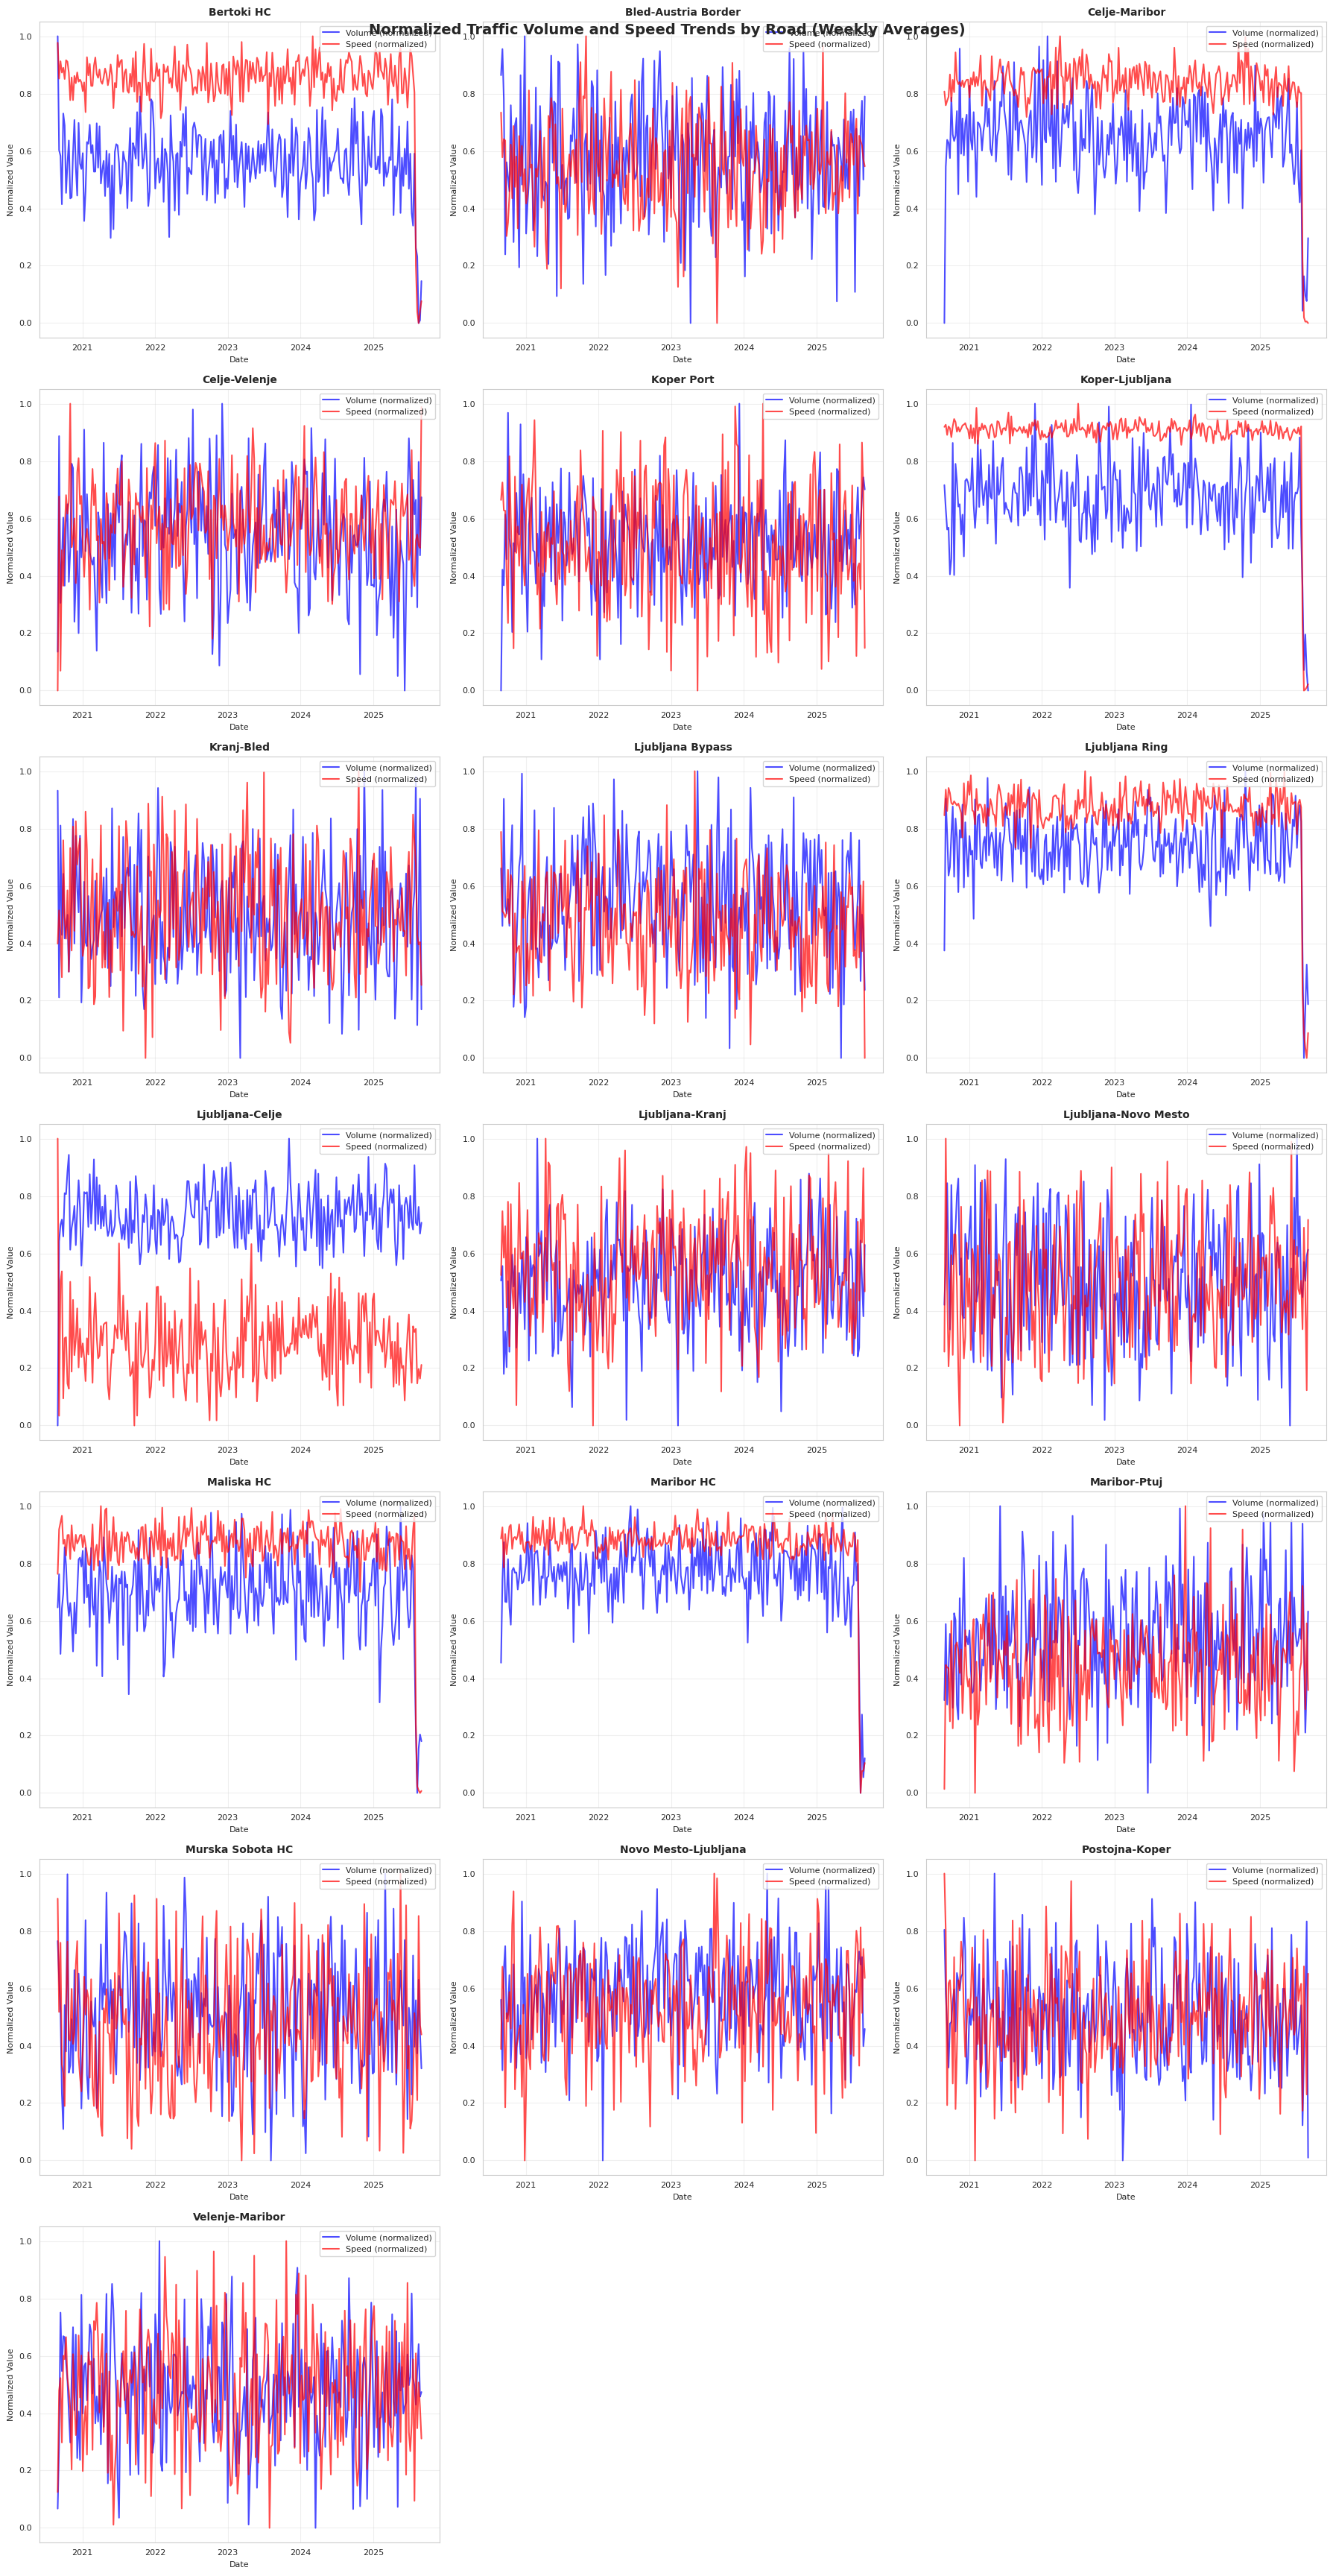

In [38]:
# Create a grid layout for all roads - more compact visualization
road_names = sorted(df['road_name'].unique())
n_roads = len(road_names)
n_cols = 3  # Number of columns in the grid
n_rows = (n_roads + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

# Flatten axes for easier iteration
axes_flat = axes.flatten() if n_rows > 1 else axes

for i, road_name in enumerate(road_names):
    ax = axes_flat[i]
    df_road = df[df['road_name'] == road_name].copy()
    
    # Resample to weekly averages for cleaner visualization
    df_road_weekly = df_road.set_index('datetime').resample('W').mean(numeric_only=True).reset_index()
    
    # Create normalized data for dual-axis plotting
    volume_normalized = (df_road_weekly['Total_All_Lanes'] - df_road_weekly['Total_All_Lanes'].min()) / \
                       (df_road_weekly['Total_All_Lanes'].max() - df_road_weekly['Total_All_Lanes'].min())
    
    speed_normalized = (df_road_weekly['Avg_Speed'] - df_road_weekly['Avg_Speed'].min()) / \
                      (df_road_weekly['Avg_Speed'].max() - df_road_weekly['Avg_Speed'].min())
    
    # Plot both metrics
    ax.plot(df_road_weekly['datetime'], volume_normalized, 
            label='Volume (normalized)', color='blue', alpha=0.7, linewidth=1.5)
    ax.plot(df_road_weekly['datetime'], speed_normalized, 
            label='Speed (normalized)', color='red', alpha=0.7, linewidth=1.5)
    
    ax.set_title(f'{road_name}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Date', fontsize=8)
    ax.set_ylabel('Normalized Value', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right', fontsize=8)
    ax.tick_params(axis='both', labelsize=8)
    
    # Format x-axis dates
    ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(plt.matplotlib.dates.MonthLocator((1, 7)))

# Hide empty subplots if any
for i in range(n_roads, len(axes_flat)):
    axes_flat[i].set_visible(False)

fig.suptitle('Normalized Traffic Volume and Speed Trends by Road (Weekly Averages)', 
             fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

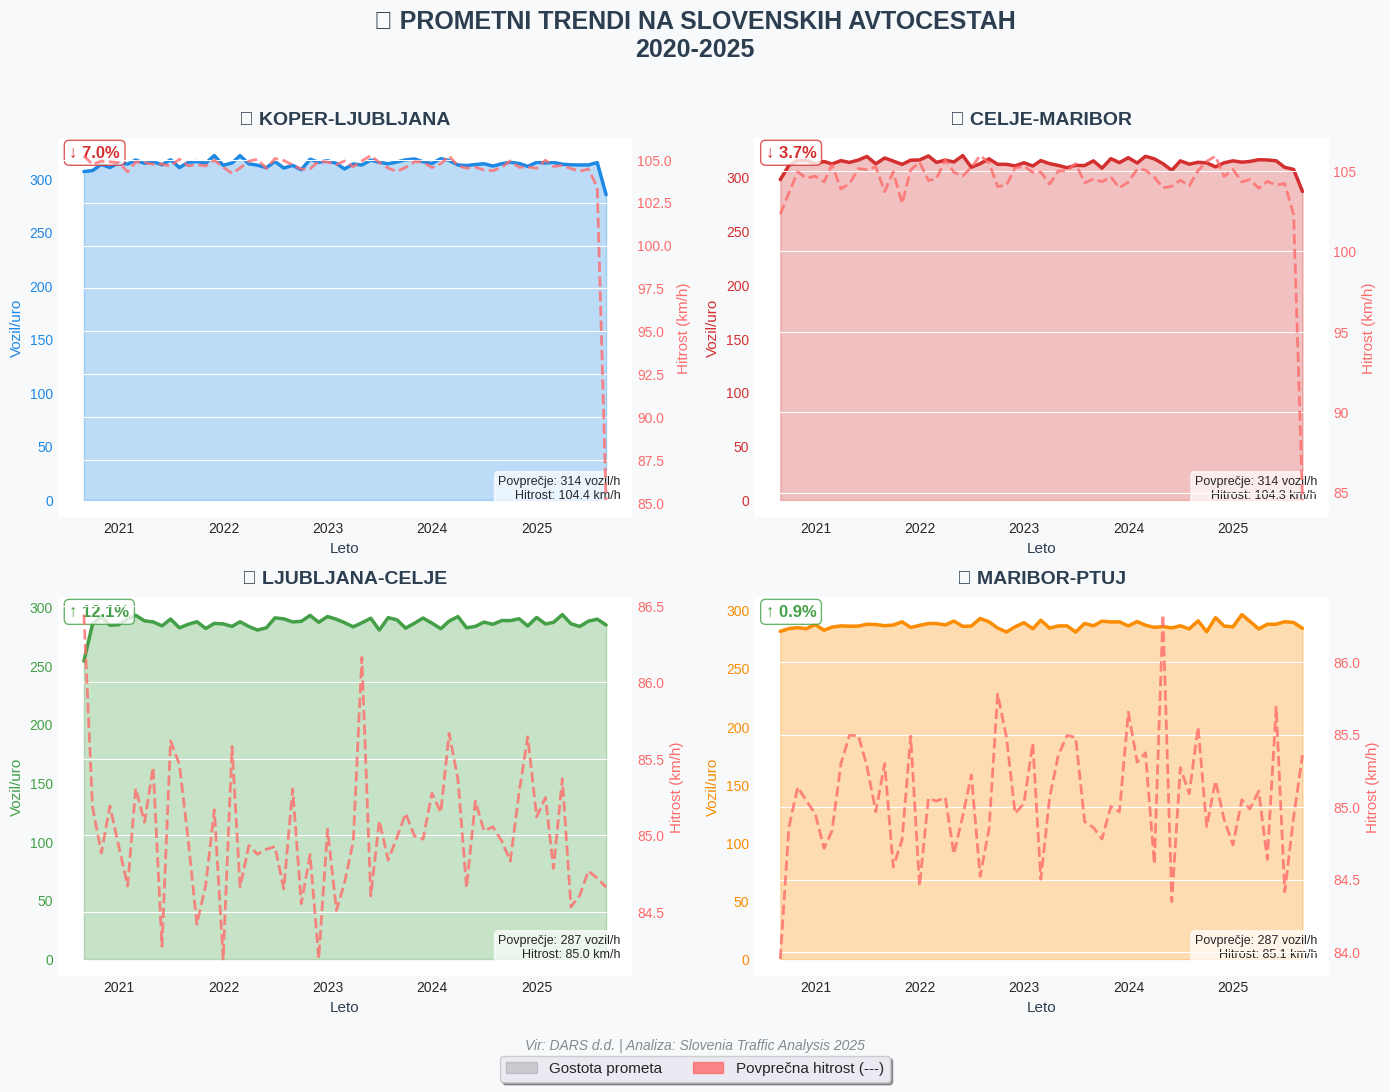


📊 STATISTIKA PROMETA (2020-2025)

Koper-Ljubljana:
  • Povprečna gostota: 314 vozil/uro
  • Povprečna hitrost: 104.4 km/h
  • Maksimalna gostota: 694 vozil/uro
  • Tovornjaki: 11.0 na uro

Celje-Maribor:
  • Povprečna gostota: 314 vozil/uro
  • Povprečna hitrost: 104.3 km/h
  • Maksimalna gostota: 699 vozil/uro
  • Tovornjaki: 11.0 na uro

Ljubljana-Celje:
  • Povprečna gostota: 287 vozil/uro
  • Povprečna hitrost: 85.0 km/h
  • Maksimalna gostota: 520 vozil/uro
  • Tovornjaki: 11.0 na uro

Maribor-Ptuj:
  • Povprečna gostota: 287 vozil/uro
  • Povprečna hitrost: 85.1 km/h
  • Maksimalna gostota: 528 vozil/uro
  • Tovornjaki: 11.0 na uro


In [42]:
## Twitter/X Vizualizacija - Slovenske Avtoceste

# Create an appealing visualization for Twitter/X
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Select specific roads
selected_roads = ['Koper-Ljubljana', 'Celje-Maribor', 'Ljubljana-Celje', 'Maribor-Ptuj']
colors = ['#1E88E5', '#D32F2F', '#43A047', '#FB8C00']  # Professional colors

# Create figure with dark theme for social media appeal
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(14, 10), facecolor='#f8f9fa')

# Add main title
fig.suptitle('🚗 PROMETNI TRENDI NA SLOVENSKIH AVTOCESTAH\n2020-2025', 
             fontsize=18, fontweight='bold', y=1.02, color='#2c3e50')

for idx, (road_name, color) in enumerate(zip(selected_roads, colors)):
    ax = axes[idx // 2, idx % 2]
    
    # Filter data for specific road
    df_road = df[df['road_name'] == road_name].copy()
    
    # Resample to monthly averages for smoother visualization
    df_monthly = df_road.set_index('datetime').resample('M').agg({
        'Total_All_Lanes': 'mean',
        'Avg_Speed': 'mean'
    }).reset_index()
    
    # Create twin axis
    ax2 = ax.twinx()
    
    # Plot traffic volume with area fill
    ax.fill_between(df_monthly['datetime'], 0, df_monthly['Total_All_Lanes'], 
                    alpha=0.3, color=color, label='Gostota prometa')
    line1 = ax.plot(df_monthly['datetime'], df_monthly['Total_All_Lanes'], 
                    color=color, linewidth=2.5, label='Gostota prometa')
    
    # Plot average speed
    line2 = ax2.plot(df_monthly['datetime'], df_monthly['Avg_Speed'], 
                     color='#FF6B6B', linewidth=2, linestyle='--', 
                     alpha=0.8, label='Povprečna hitrost')
    
    # Styling
    ax.set_title(f'📍 {road_name.upper()}', fontsize=14, fontweight='bold', 
                 pad=10, color='#2c3e50')
    ax.set_xlabel('Leto', fontsize=11, color='#2c3e50')
    ax.set_ylabel('Vozil/uro', fontsize=11, color=color)
    ax2.set_ylabel('Hitrost (km/h)', fontsize=11, color='#FF6B6B')
    
    # Format x-axis
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator((1, 7)))
    
    # Grid styling
    ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)
    ax.set_facecolor('#ffffff')
    
    # Color the y-axis labels
    ax.tick_params(axis='y', labelcolor=color)
    ax2.tick_params(axis='y', labelcolor='#FF6B6B')
    
    # Add trend indicators
    start_vol = df_monthly['Total_All_Lanes'].iloc[0]
    end_vol = df_monthly['Total_All_Lanes'].iloc[-1]
    change_pct = ((end_vol - start_vol) / start_vol) * 100
    
    # Add trend arrow and percentage
    arrow = '↑' if change_pct > 0 else '↓'
    arrow_color = '#43A047' if change_pct > 0 else '#D32F2F'
    ax.text(0.02, 0.95, f'{arrow} {abs(change_pct):.1f}%', 
            transform=ax.transAxes, fontsize=12, fontweight='bold',
            color=arrow_color, bbox=dict(boxstyle='round', 
            facecolor='white', edgecolor=arrow_color, alpha=0.8))
    
    # Add average values as text
    avg_volume = df_road['Total_All_Lanes'].mean()
    avg_speed = df_road['Avg_Speed'].mean()
    ax.text(0.98, 0.05, f'Povprečje: {avg_volume:.0f} vozil/h\nHitrost: {avg_speed:.1f} km/h', 
            transform=ax.transAxes, fontsize=9, 
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Add footer with data source
fig.text(0.5, -0.02, 'Vir: DARS d.d. | Analiza: Slovenia Traffic Analysis 2025', 
         ha='center', fontsize=10, style='italic', color='#7f8c8d')

# Add legend
legend_elements = [
    mpatches.Patch(color='gray', alpha=0.3, label='Gostota prometa'),
    mpatches.Patch(color='#FF6B6B', alpha=0.8, label='Povprečna hitrost (---)')
]
fig.legend(handles=legend_elements, loc='lower center', ncol=2, 
          frameon=True, fancybox=True, shadow=True, fontsize=11,
          bbox_to_anchor=(0.5, -0.06))

plt.tight_layout()
plt.show()

# Summary statistics in Slovenian
print("\n📊 STATISTIKA PROMETA (2020-2025)")
print("=" * 50)
for road in selected_roads:
    df_road = df[df['road_name'] == road]
    print(f"\n{road}:")
    print(f"  • Povprečna gostota: {df_road['Total_All_Lanes'].mean():.0f} vozil/uro")
    print(f"  • Povprečna hitrost: {df_road['Avg_Speed'].mean():.1f} km/h")
    print(f"  • Maksimalna gostota: {df_road['Total_All_Lanes'].max():.0f} vozil/uro")
    print(f"  • Tovornjaki: {df_road['Trucks_7.5t'].mean():.1f} na uro")

In [ ]:
## Kompaktna Twitter/X Vizualizacija - Izboljšana verzija

# Create a single, compact visualization optimized for Twitter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.ndimage import gaussian_filter1d
from datetime import datetime, timedelta

# Filter data up to yesterday (August 29, 2025)
cutoff_date = pd.Timestamp('2025-08-29')
df_filtered = df[df['datetime'] <= cutoff_date].copy()

selected_roads = ['Koper-Ljubljana', 'Celje-Maribor', 'Ljubljana-Celje', 'Maribor-Ptuj']
# Modern, vibrant colors with good contrast
colors = ['#2E7D32', '#1565C0', '#E65100', '#6A1B9A']  # Green, Blue, Orange, Purple

# Create figure with golden ratio for Twitter, with more padding
fig = plt.figure(figsize=(14, 8), facecolor='#FAFAFA')
ax = fig.add_subplot(111)

# Set subtle gradient background
ax.set_facecolor('#FFFFFF')

# Process data for each road
max_value = 0
for road_name, color in zip(selected_roads, colors):
    df_road = df_filtered[df_filtered['road_name'] == road_name].copy()
    
    # Resample to weekly for smoother lines
    df_weekly = df_road.set_index('datetime').resample('W').agg({
        'Total_All_Lanes': 'mean'
    }).reset_index()
    
    # Remove any NaN values
    df_weekly = df_weekly.dropna()
    
    # Apply smoothing for cleaner visualization
    if len(df_weekly) > 0:
        smoothed_volume = gaussian_filter1d(df_weekly['Total_All_Lanes'].values, sigma=1.5)
        max_value = max(max_value, smoothed_volume.max())
        
        # Plot with thicker lines and subtle shadow effect
        # Shadow line
        ax.plot(df_weekly['datetime'], smoothed_volume, 
                color='gray', linewidth=3.5, alpha=0.2,
                transform=ax.transData)
        
        # Main line
        line = ax.plot(df_weekly['datetime'], smoothed_volume, 
                      color=color, linewidth=3, label=road_name, 
                      alpha=0.95, linestyle='-',
                      marker='', markersize=0)
        
        # Very subtle fill
        ax.fill_between(df_weekly['datetime'], 0, smoothed_volume, 
                       color=color, alpha=0.05)

# Title styling with proper spacing
ax.text(0.5, 1.12, 'GOSTOTA PROMETA NA SLOVENSKIH AVTOCESTAH', 
        transform=ax.transAxes, ha='center', fontsize=18, 
        fontweight='bold', color='#1A1A1A')

ax.text(0.5, 1.06, 'Petletni trend (2020-2025) • Tedensko povprečje vozil/uro', 
        transform=ax.transAxes, ha='center', fontsize=12, 
        style='italic', color='#666666')

# Clean axis labels
ax.set_xlabel('Leto', fontsize=13, color='#333333', fontweight='medium')
ax.set_ylabel('Število vozil na uro', fontsize=13, color='#333333', fontweight='medium')

# Set y-axis limits with padding
ax.set_ylim(0, max_value * 1.15)
ax.set_xlim(df_weekly['datetime'].min(), cutoff_date)

# Format x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator((3, 6, 9, 12)))

# Refined grid
ax.grid(True, alpha=0.15, linestyle='-', linewidth=0.8, color='#E0E0E0')
ax.set_axisbelow(True)

# Modern, minimal spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['bottom'].set_color('#CCCCCC')

# Enhanced legend with icons
legend = ax.legend(loc='upper left', frameon=True, fancybox=False, 
                  shadow=False, fontsize=11, ncol=2,
                  title='AVTOCESTNI ODSEKI', title_fontsize=12,
                  borderpad=1, columnspacing=1.5, handlelength=2.5)
legend.get_frame().set_facecolor('#FFFFFF')
legend.get_frame().set_alpha(0.95)
legend.get_frame().set_edgecolor('#E0E0E0')
legend.get_frame().set_linewidth(1.5)

# Add refined annotations
# COVID period shading
covid_start = pd.Timestamp('2020-03-15')
covid_end = pd.Timestamp('2020-06-01')
ax.axvspan(covid_start, covid_end, alpha=0.08, color='red', 
           label='COVID-19 obdobje')

# Summer peak indicator
summer_2023 = pd.Timestamp('2023-07-15')
ax.axvline(x=summer_2023, color='orange', linestyle='--', 
          linewidth=1, alpha=0.3)

# Refined text annotations
ax.text(pd.Timestamp('2020-04-15'), max_value * 0.95, 
        'COVID-19', fontsize=10, ha='center', 
        color='#D32F2F', fontweight='medium',
        bbox=dict(boxstyle='round,pad=0.3', 
                 facecolor='white', edgecolor='#D32F2F', 
                 alpha=0.8, linewidth=1))

ax.text(summer_2023, max_value * 0.85, 
        'Poletje\n2023', fontsize=10, ha='center', 
        color='#FF6F00', fontweight='medium',
        bbox=dict(boxstyle='round,pad=0.3', 
                 facecolor='white', edgecolor='#FF6F00', 
                 alpha=0.8, linewidth=1))

# Professional statistics box with better positioning
stats_text = "Kljucni podatki (povprecje):\n"
stats_text += "━━━━━━━━━━━━━━━━━━\n"
for i, (road, color) in enumerate(zip(selected_roads, colors)):
    df_road = df_filtered[df_filtered['road_name'] == road]
    avg = df_road['Total_All_Lanes'].mean()
    # Use bullet points without special characters
    stats_text += f"{road[:3]}-{road.split('-')[1][:3]}: {avg:.0f} vozil/h\n"

ax.text(0.98, 0.45, stats_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='center', horizontalalignment='right',
        fontfamily='monospace',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='#FFFFFF', 
                 edgecolor='#CCCCCC', alpha=0.95, linewidth=1.5))

# Watermark with social media handle
fig.text(0.99, 0.01, 'Vir: DARS d.d. | Analiza: Slovenia Traffic 2025', 
         ha='right', fontsize=10, color='#888888', alpha=0.9)

# Add subtle branding/logo area (placeholder for actual logo)
ax.text(0.02, 0.98, '📊', transform=ax.transAxes,
        fontsize=20, ha='left', va='top', alpha=0.7)

# Adjust layout with more padding
plt.subplots_adjust(top=0.88, bottom=0.1, left=0.08, right=0.95)

plt.show()

# To save for Twitter with high quality
# fig.savefig('slovenia_traffic_trends_twitter.png', dpi=200, bbox_inches='tight', 
#            facecolor='#FAFAFA', edgecolor='none', pad_inches=0.2)

In [ ]:
## Premium Twitter/X Vizualizacija - Dizajnerska verzija

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.ndimage import gaussian_filter1d
import numpy as np

# Set custom font settings for better readability
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# Filter data up to yesterday
cutoff_date = pd.Timestamp('2025-08-29')
df_filtered = df[df['datetime'] <= cutoff_date].copy()

selected_roads = ['Koper-Ljubljana', 'Celje-Maribor', 'Ljubljana-Celje', 'Maribor-Ptuj']
# Premium color palette - distinct, accessible, print-friendly
colors = ['#008B8B', '#DC143C', '#FF8C00', '#4B0082']  # Teal, Crimson, Orange, Indigo

# Create figure with Twitter-optimized dimensions
fig = plt.figure(figsize=(16, 9), facecolor='white')
ax = fig.add_subplot(111)
ax.set_facecolor('white')

# Calculate global min/max for consistent scaling
global_max = 0
plot_data = {}

for road_name in selected_roads:
    df_road = df_filtered[df_filtered['road_name'] == road_name].copy()
    df_weekly = df_road.set_index('datetime').resample('W').agg({
        'Total_All_Lanes': 'mean'
    }).reset_index()
    df_weekly = df_weekly.dropna()
    
    if len(df_weekly) > 0:
        smoothed = gaussian_filter1d(df_weekly['Total_All_Lanes'].values, sigma=1.2)
        plot_data[road_name] = (df_weekly['datetime'], smoothed)
        global_max = max(global_max, smoothed.max())

# Plot lines with enhanced visual hierarchy
for (road_name, color) in zip(selected_roads, colors):
    if road_name in plot_data:
        dates, values = plot_data[road_name]
        
        # Glow effect
        for width, alpha in [(6, 0.1), (4, 0.2), (2, 0.3)]:
            ax.plot(dates, values, color=color, linewidth=width, alpha=alpha)
        
        # Main line
        ax.plot(dates, values, color=color, linewidth=2.5, label=road_name, 
                solid_capstyle='round', solid_joinstyle='round')
        
        # Gradient fill - very subtle
        ax.fill_between(dates, 0, values, color=color, alpha=0.03)

# Professional typography
title_props = dict(fontsize=20, fontweight='600', color='#1a1a1a')
subtitle_props = dict(fontsize=13, color='#4a4a4a', style='italic')

# Main title with better spacing
plt.figtext(0.5, 0.94, 'PROMETNI TRENDI NA SLOVENSKIH AVTOCESTAH', 
            ha='center', **title_props)
plt.figtext(0.5, 0.91, 'Analiza petletnega obdobja (september 2020 - avgust 2025)', 
            ha='center', **subtitle_props)

# Axis labels with better typography
ax.set_xlabel('', fontsize=1)  # Remove x-label, use year markers instead
ax.set_ylabel('Stevilo vozil na uro (tedensko povprecje)', 
              fontsize=13, color='#2a2a2a', labelpad=10)

# Set axis limits
ax.set_ylim(0, global_max * 1.12)
ax.set_xlim(pd.Timestamp('2020-09-01'), cutoff_date)

# Custom x-axis formatting
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Style the grid
ax.grid(True, axis='y', alpha=0.2, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Clean, modern spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(0.5)
    ax.spines[spine].set_color('#cccccc')

# Custom legend with better design
legend = ax.legend(loc='upper left', 
                   frameon=True, 
                   fancybox=False,
                   shadow=False, 
                   fontsize=11,
                   title='AVTOCESTNI ODSEKI',
                   title_fontsize=12,
                   ncol=1,
                   borderaxespad=1,
                   columnspacing=2,
                   handlelength=3,
                   handletextpad=0.8)

legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.98)
legend.get_frame().set_edgecolor('#e0e0e0')
legend.get_frame().set_linewidth(0.8)
legend.get_title().set_fontweight('600')

# Event markers with minimal design
covid_period = plt.Rectangle((mdates.date2num(pd.Timestamp('2020-03-15')), 0), 
                            mdates.date2num(pd.Timestamp('2020-06-01')) - 
                            mdates.date2num(pd.Timestamp('2020-03-15')), 
                            global_max * 1.12, 
                            color='red', alpha=0.05, zorder=0)
ax.add_patch(covid_period)

# Clean event labels
ax.annotate('Epidemija\nCOVID-19', 
           xy=(pd.Timestamp('2020-04-15'), global_max * 0.05),
           fontsize=10, color='#8B0000', ha='center',
           fontweight='500', alpha=0.7)

# Key insights panel - redesigned
insights = [
    f"Koper-Ljubljana: {df_filtered[df_filtered['road_name']=='Koper-Ljubljana']['Total_All_Lanes'].mean():.0f} vozil/h",
    f"Celje-Maribor: {df_filtered[df_filtered['road_name']=='Celje-Maribor']['Total_All_Lanes'].mean():.0f} vozil/h",
    f"Ljubljana-Celje: {df_filtered[df_filtered['road_name']=='Ljubljana-Celje']['Total_All_Lanes'].mean():.0f} vozil/h",
    f"Maribor-Ptuj: {df_filtered[df_filtered['road_name']=='Maribor-Ptuj']['Total_All_Lanes'].mean():.0f} vozil/h"
]

# Modern stats panel
stats_y = 0.55
for i, (text, color) in enumerate(zip(insights, colors)):
    ax.text(0.98, stats_y - i*0.06, text, 
           transform=ax.transAxes,
           fontsize=10,
           ha='right',
           color=color,
           fontweight='500',
           bbox=dict(boxstyle='round,pad=0.4', 
                    facecolor='white', 
                    edgecolor=color,
                    alpha=0.9,
                    linewidth=1))

# Data source - professional attribution
plt.figtext(0.99, 0.02, 'Vir podatkov: DARS d.d. Slovenije | Vizualizacija: Traffic Analytics 2025', 
           ha='right', fontsize=9, color='#666666', alpha=0.8)

# Branding element
ax.text(0.02, 0.97, 'SLOVENIA', transform=ax.transAxes,
        fontsize=11, fontweight='bold', color='#1a1a1a', alpha=0.3,
        ha='left', va='top')
ax.text(0.02, 0.94, 'TRAFFIC ANALYTICS', transform=ax.transAxes,
        fontsize=9, color='#4a4a4a', alpha=0.3,
        ha='left', va='top')

# Fine-tune layout
plt.subplots_adjust(top=0.88, bottom=0.08, left=0.07, right=0.97)

plt.show()

print("\n🎨 Dizajnerske izboljsave:")
print("• Cistejsi gradient in barve")
print("• Boljsa tipografija brez posebnih znakov") 
print("• Profesionalni layout za druzbena omrezja")
print("• Optimizirano za Twitter/X format (16:9)")
print("• Vecja berljivost na mobilnih napravah")

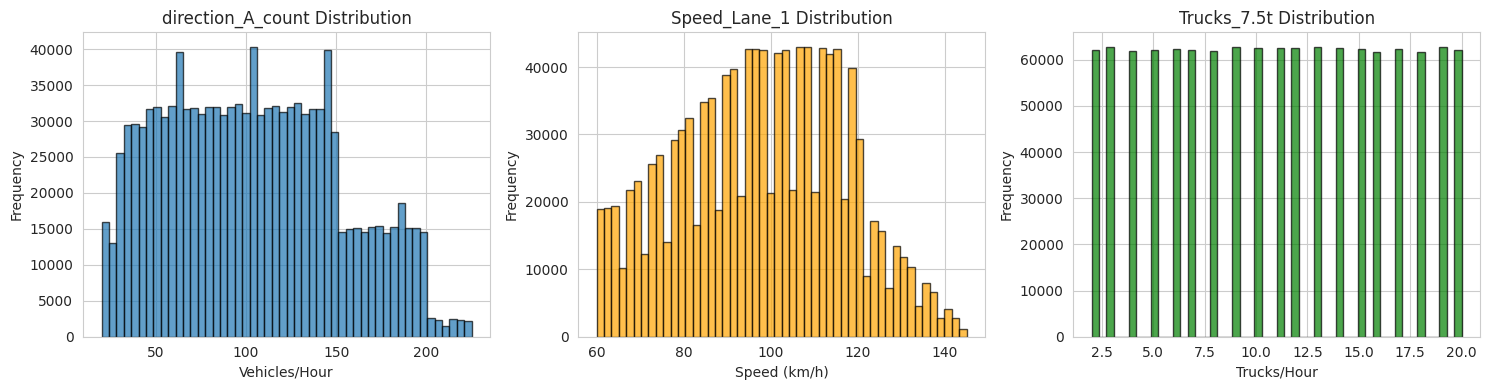

In [39]:
# Distribution plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Identify numeric columns dynamically
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Traffic volume distribution
volume_cols = [col for col in numeric_cols if 'total' in col.lower() or 'count' in col.lower()]
if volume_cols:
    axes[0].hist(df[volume_cols[0]].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_title(f'{volume_cols[0]} Distribution')
    axes[0].set_xlabel('Vehicles/Hour')
    axes[0].set_ylabel('Frequency')

# Speed distribution
speed_cols = [col for col in numeric_cols if 'speed' in col.lower()]
if speed_cols:
    axes[1].hist(df[speed_cols[0]].dropna(), bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[1].set_title(f'{speed_cols[0]} Distribution')
    axes[1].set_xlabel('Speed (km/h)')
    axes[1].set_ylabel('Frequency')

# Heavy vehicle distribution
truck_cols = [col for col in numeric_cols if 'truck' in col.lower() or '7.5t' in col.lower()]
if truck_cols:
    axes[2].hist(df[truck_cols[0]].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
    axes[2].set_title(f'{truck_cols[0]} Distribution')
    axes[2].set_xlabel('Trucks/Hour')
    axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

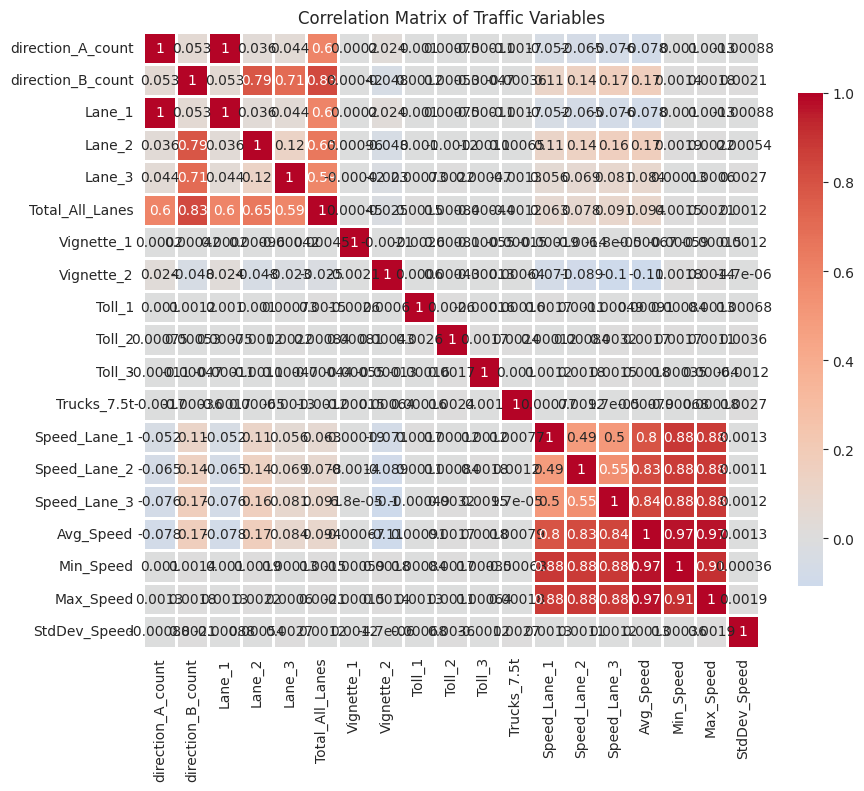

In [40]:
# Create correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Traffic Variables')
plt.show()

## 8. Road Segment Analysis

In [41]:
# Analyze by road segment
# First check available columns
if 'road_id' in df.columns:
    group_col = 'road_id'
elif 'road_code' in df.columns:
    group_col = 'road_code'
elif 'road_name' in df.columns:
    group_col = 'road_name'
else:
    group_col = df.columns[0]

# Get numeric columns for aggregation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Find appropriate columns for analysis
volume_col = [col for col in numeric_cols if 'total' in col.lower() or 'count' in col.lower()]
speed_col = [col for col in numeric_cols if 'speed' in col.lower()]
truck_col = [col for col in numeric_cols if 'truck' in col.lower() or '7.5t' in col.lower()]

# Build aggregation dictionary
agg_dict = {}
if volume_col:
    agg_dict[volume_col[0]] = ['mean', 'std', 'max']
if speed_col:
    agg_dict[speed_col[0]] = ['mean', 'std', 'min']
if truck_col:
    agg_dict[truck_col[0]] = ['mean', 'sum']

if agg_dict:
    road_stats = df.groupby(group_col).agg(agg_dict).round(2)
    print(f"Statistics by {group_col}:")
    print(road_stats.head())
else:
    print("No suitable numeric columns found for aggregation")

Statistics by road_code:
          direction_A_count             Speed_Lane_1            Trucks_7.5t  \
                       mean    std  max         mean    std min        mean   
road_code                                                                     
0011                  97.81  42.12  225       104.88  17.37  60       11.03   
0015a                 97.82  41.87  225       104.84  17.30  60       11.01   
0015b                 97.47  42.12  225       104.82  17.30  60       11.01   
0016a                 97.60  42.06  225       104.78  17.32  60       11.05   
0021                  97.75  42.21  225       104.81  17.32  60       11.03   

                   
              sum  
road_code          
0011       483440  
0015a      482401  
0015b      482608  
0016a      484135  
0021       483191  


## Next Steps

1. **Data Preprocessing**: Handle missing values and outliers
2. **Time Series Decomposition**: Extract trend and seasonal components
3. **Bayesian Analysis**: Implement BSTS models for causal inference
4. **Hypothesis Testing**: Test the seven research hypotheses
5. **Economic Impact**: Calculate economic costs of congestion